In [6]:
!pip install matplotlib requests gensim pymorphy3 scikit-learn bs4 nltk numpy lxml


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import requests
from bs4 import BeautifulSoup
from gensim.models import Word2Vec
import numpy as np
import re
import pymorphy3
import nltk
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from collections import defaultdict
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Егор\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
url = 'https://yandex.ru/maps/org/rgrtu/1553960425/reviews/?ll=39.722577%2C54.613254&z=16'

headers = {'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/53.0.2785.143 Safari/537.36'}


In [3]:
page = requests.get(url, headers=headers)

In [4]:
soup = BeautifulSoup(page.text, 'lxml')

In [5]:
print(soup)

<!DOCTYPE html>
<html dir="ltr" lang="ru" prefix="og: http://ogp.me/ns#"> <head> <meta content="IE=edge" http-equiv="X-UA-Compatible"/> <meta charset="utf-8"/> <meta content="width=device-width, user-scalable=no, initial-scale=1.0, maximum-scale=1.0" name="viewport"/> <link href="/maps/yandex-manifest.json" rel="manifest"/> <meta content="/maps/mstile-browserconfig.xml" name="msapplication-config"/> <meta content="yes" name="mobile-web-app-capable"/> <meta content="yes" name="apple-mobile-web-app-capable"/> <meta content="translucent-black" name="apple-mobile-web-app-status-bar-style"/> <meta content="#fff" name="theme-color"/> <link href="//yastatic.net/s3/front-maps-static/maps-front-maps/static/v53/icons/favicon/favicon.png" rel="icon" type="image/png"/> <link href="//yastatic.net/s3/front-maps-static/maps-front-maps/static/v53/icons/favicon/favicon.svg" rel="icon" type="image/svg+xml"/> <link href="//yastatic.net/s3/front-maps-static/maps-front-maps/static/v53/icons/favicon/apple-t

In [ ]:
response_texts = soup.find_all(attrs={'class': 'business-review-view__body-text'})
for i in range(len(response_texts)):
    response_texts[i] = response_texts[i].text

In [ ]:
response_values = soup.find_all(attrs={'itemprop': 'ratingValue'})
for i in range(len(response_values)):
    response_values[i] = int(response_values[i].split()[2][-5])

In [ ]:
response_dates = soup.find_all(attrs={'class': 'business-review-view__date'})
for i in range(len(response_dates)):
    response_dates[i] = response_dates[i].text

In [241]:
response_texts = [
    "Я закончила РГУ 6 лет назад. Училась на экономическом, специальность ( тогда ещё были) налоги и налогообложение . Учится там легко, если учишься знания будут. Устроилась на работу быстро после . Стоит поступать или нет не могу сказать) для всех свои критерии. Я не могу его хвалить , но и сказать, что жалею об учебе там тоже не могу)",
    "Я окончил университет 7 лет назад. Многое могло измениться. Если хотеть учиться, то знания там дают, но сильно не требуют отдачи. Если учиться ради высшего образования, как это делал я, то важно просто посещать занятия. Это именно про мой факультет (ИППСР)",
    "Я училась на экономическом факультете ,специальность «бух.учёт ,анализ и аудит». На тот момент это была на мой взгляд единственная специальность на нашем факультете ,где давали знания. Но, бух.учету можно научится и на курсах в краткий период времени, если Вы решите связать свою жизнь с этим. После нашего выпуска открывали специальность «логистика», если бы она была бы в мое время - пошла бы туда точно, направление очень актуальное и востребованное . Так получилось ,что работала в дальнейшем логистом в крупной транспортной компании с хорошей зп, работа стрессовая ,но интересная и ?. Если не ошибаюсь, данная специальность ещё есть в сельхозе на автодорожном факультете ,только называется иначе. К сожалению ,работодатели хотят всех с опытом, поэтому ,что бухгалтером ,что логистом надо иметь либо знакомства ,либо быть очень прорывной. На сколько мне известно, экономический факультет вообще закрывали на какое-то время ,были какие-то проблемы с лицензией ,как сейчас обстоят дела не могу подсказать . По другим факультетам ,к сожалению ,тоже не смогу сориентировать . А так в целом студенческая жизнь яркая ,много было различных мероприятий . Активистов отправляли даже на олимпиаду в Сочи работать волонтёрами.",
    "Я училась на экономе. Что я могу сказать, свою дочь я бы не отдала туда)) зря потраченное время. Знаний сейчас нигде не получишь нормальных, с этим все плохо в целом по России. Если захочешь быть хорошим специалистом, то потребуются дополнительные курсы (желательно зарубежные вообще) Самая большая моя ошибка - это узнать только на 5 курсе, что универ нужен для поиска связей и хороших знакомств. И все) если и будешь учиться где то, то не теряй время, больше активной жизни в универе и особенно с предприимчивыми людьми. Ходи на все возможные курсы, пробуй подрабатывать. Очень важен опыт, а не знания. И на счёт оценок не парься, никто на них не посмотрит потом. На работу листочек с оценками не надо нести. Это говорю как человек, который на красный диплом отучился. Оно не стоит того совсем. Пока твой мозг пластичен лучше постараться отучился на ИТ специалистов. Все таки это востребовано и точно пригодится. В РГУ языковые факультеты ещё норм. Маркетинг, эконом и т. д. точно нет.",
    'Я училась в 2010-2015 гг. Времени прошло уже очень много конечно. Училась на факультете "История и международные отношения". Я училась на бесплатном на заочке. Сложностей в учёбе никаких не возникало. Преподаватели, действительно хорошие, отзывчивые и понимающие.',
    'Я поступала давно, в 2011, многие условия изменились и даже не знаю сейчас есть ли мое направление "Налоги". Учиться было интересно и я получила хорошие знания, но опять же не могу сказать, какой там сейчас преподавательский состав, возможно поменяли. По профессии не работаю, но знания, полученные в РГУ переодически применяю.',
    'Я училась в РГУ. Вуз хороший, преподаватели понимающие я училась на факультет финансы и кредит. Большие кабинеты, лекции проходили совместно с другой группой. На семинарах была одна группа. Всегда были разные мероприятия, и поэтому можно проявить себя в творчестве . Так же давали общежитие раньше. Я отучиться и не пожалела , что поступила в РГУ',
    'Я училась на экономе. Если учиться, а не ходить ради бумажки, то знания дают нормальные. Радовало, что не было взяток на экзаменах, как в других местах. Да и для активистов было чем заняться ?в других институтах конечно не училась, но о студенческих годах приятные воспоминания',
    'Я училась на экономическом факультете, но это было уже семь лет назад. Тогда меня лично все устраивало: и преподаватели, и качество знаний, атмосфера вуза. Но насколько я знаю после моего выпуска у ВУЗа начались какие-то проблемы с аккредитацией. Поэтому как там сейчас дела обстоят не подскажу. Многое ещё зависит от желания учиться, какую профессию собираетесь получать. На экономе было нормально учиться.',
    'Училась на начфаке. Каких-то звезд здесь не наберёшь. Обычное образование ВУЗа. Много теории и мало практики. Практика живёт в колледжах. Но здесь ты получишь высшее образование, пройдешь по одной практики в школе и в детском лагере, напишешь несколько курсовых и защитишь диплом. Вуаля, ты учитель начальных классов. А вот потом на своём месте работы ты поймёшь, на кого ты училась и что надо делать)',
    'На самом деле зря потраченное время на факультете экономики. Это было давно, не знаю , может сейчас что-то изменилось. Единственное хорошо давали знания по бух.учету зав.кафедрой Сомова. Но я все равно не рекомендовала бы поступать в РГУ на экономиста',
    'Учился. 11 Лет назад. Учился в ИИЯ (Институт Иностранных языков) на специальность учитель информатики и английского языка. После окончания ВУЗа работаю по профессии в школе, знаний хватает. Учится сложно, но опять же это зависит от многих разных факторов, начиная от собственного трудолюбия, кончая преподавателями, которые будут вести пары. В общежитии живут прекрасные люди, условия проживания приемлемые, но опять же может быть немного по-разному, но мне это было не критично. Единственный минус, после окончания ВУЗа маленькая зарплата в школе, чтобы заработать, приходиться брать двойные нагрузки, что весьма не просто. А так в целом впечатления положительные. С удовольствием отучился бы второй раз.',
    'Мало что могу сказать о вузе. Так как училась в отдельном корпусе на финансах. И почти не бывала в главном корпусе. И в каких то мероприятиях крупных тоже не участвовала. Мой факультет был довольно средний: были хорошие преподаватели и не очень. Я на третьем курсе устроилась на работу и много пропускала занятий, но у преподавателей никогда не было ко мне вопросов. То есть особо не следят за посещаемостью. Сессия была не сложная, защита диплома тоже. Про знания решать будет вам, мне знания вуза не пригодились вообще. Я не пошла работал по специальности) но рекомендовала бы поступать на факультеты в главный корпус- так как там весь движ и можно было поучаствовать в разных мероприятия. Подруга училась на историка - английском факультете. Очень им довольна, даже ездила в другие страны по обмену.',
    'Когда я училась, мне всё нравилось. Хорошие преподаватели. Могу сказать только о физико-математическом факультете в целом, и о направлении Индустрия моды и красоты (как-то так) в частности, но 10 лет назад оно только появилось, так что много изменений произошло',
    'Я в 2015 закончила ИППиСР. По специальности учитель- логопед. Грамотные преподаватели, интересные пары, насыщенная студенческая жизнь. Хорошая стипендия. Мне все нравилось. с теплом вспоминаю это время. Но это было 7 лет назад... Сейчас даже не знаю как там.',
    'Факультет истории и международных отношений: была специальность "История и Английский язык". Преподавание в основном хорошее. Была достаточно престижная специальность, как ни странно. Если что-то подобное ещё осталось - рекомендую. На этом же факультете есть "Международные отношения" - лично мне не показалась специальность удачной, много знакомых оттуда, по итогу образование про все и про ничего. Есть ещё "Реклама и связи с общественностью" - ничего не могу сказать, не общался. Из факультетов ещё сильный Институт Иностранных Языков. Это если к языкам есть тяга.',
    'Хороший вуз. Менее серьёзный чем Радик более душевный, на мой взгляд, занятия доступны, преподы менее жёсткие... Большую часть зачётов и экзаменов проще получить просто присутствуя на занятиях) Много внеурочных кружков, например туризм(очень классный в наше время))))или театральный кружок. ... Ну и прочее. Советую короче)',
    'Я 7 лет назад уже закончила..вуз мне понравился, помимо учебы есть много активностей, доп курсов, проводят разные конкурсы и тд. Насчёт эконома не знаю как сейчас там дела обстоят, но когда я училась,то в целом нормально. Были сильные и хорошие учителя, были те у кого любимчики были, но это наверное везде есть. По специальности не работала, поэтому насчёт знаний точно не могу сказать.',
    'Я училась в РГУ, в ИППСР, выпустилась 7 лет назад, и думаю, что там могло многое поменяться. Во всех факультетах разная ситуация, зависит от руководства. Во время моей учебы все было нормально, преподаватели адекватные, понимающие. Тот кто идёт получать знания - получит их в полной мере.',
    'Я был на физмате на специальности моиаис. Всё же если хочется больше айти тем - думаю, лучше в радик, но там больше долбанутых переводов и из-за этого учеба будет тяжелее. А тут были вполне нормальные преподы. Качество знаний, ну, думаю тут всё стандартно. Темы которые реально нужны были толкьо последнее два года и там был только один препод. Но, в целом, я очень давно закончил универ, в 15 году, там многое могло с тех пор изменится. Я, в целом, не разочарован этим опытом . А, ну и плюс подружился там с одним преподом и в итоге он был моим научным руководителем, потом ещё клёвые проекты мутили вместе. Думаю это можно вписать в плюс ?',
    'Я лично окончила бакалавриат и магистратуру по направлению учитель английского и филолог, сейчас практически весь пед состав поменялся, не могу отвечать, что там, но раньше было хорошо, нравилось, но там нужно реально трудится очень много. Если интересны языки и преподавание то хороший вариант',
    'Учеба была очень интересная, преподаватели сильные ( по крайней мере на пед образовании), очень много было полезного для дальнейшей работы. Практику организовывали тоже на должном уровне. Да и в целом историческое образование как базовое - неплохая основа. Другой момент, что среди преподавателей есть персоны своеобразные (спустя 7 лет после выпуска все ещё работают), относительно магистратуры дальнейшей - в мою бытность не было возможности продолжить профиль образования (кроме чисто педагогического), не слишком хорошо работает помощь в трудоустройстве студентов. Если планируете работать в школе/колледже/лицее/гимназии и тд, то база для этого замечательная. Если же интересует чисто историческое (академическое ) образование, я бы рекомендовал подумать об ином ВУЗе, поскольку сам после бакалавриата поступал в другое заведение и есть, с чем сравнивать. Относительно рекламы и связей с общественностью, с международными отношениями вряд ли могу поделиться взглядом изнутри',
    'Учился в РГУ на юридическом. Учеба если хоть немного соображаешь не сложная. Качество знаний среднее, в основном одна теория оторванная от практики. Поступать именно на юрфак не советую, очень низкая востребованность в юристах. И перспектив ни каких. Советую поступать на какое нибудь востребованное в обозримом будущем направление.',
    'Я закончила нач.фак. и магистратуру языковое и лит.образ.шк. Про качество знаний сложно сказать ... по специальности я ещё не работала). Мне учиться там нравилось, из плюсов я полностью училась на бюджете .На последнем курсе работала лаборантом на кафедре. Преподаватели все были адекватные, но это было 5 лет назад... Могло что-то поменяться ? Если вы выбрали профессию учителя я бы посоветовала, многие из группы работают в школе. Про остальные специальности сказать не могу)',
    'Училась да 7 лет назад. Платно. Были преподы которые вели себя по хамски и матом ругались всю пару и опаздывали постоянно приезжали за 10мин до конца пары. Как будто это не они нам должны, а мы им. А были и отличные преподаватели. В целом 4 из 5 балла. Но думаю что так везде. Некоторые преподы работают в нескольких вузах.',
    'Училась с 2010 по 2015 годы на экономическом факультете. Я осталась довольна уровнем знаний, подходом ко мне кафедры (я училась очно на бюджете и вышла работать 2/2, мне все шли на встречу и позволяли пропускать лекции и сдавать в другие дни.) Сейчас, думаю, все поменялось. И преподаватели и дисциплины.',
    'Училась с 2011 по 2015. Поступала на экспериментальное направление, были первооткрывателями, так что не уверена будут ли полезны мои знания. Тем более 7 лет прошло с выпуска. Факультет физико-математический. Направление сервис (сервис в индустрии моды и красоты. Швейное дело). Декан была крутая у нас, никогда не было с ней проблем, дружелюбная, готова была помочь. Не знаю, там ли она еще. Лично меня почти все преподаватели устроили и особенно наш куратор, которая вела у нас несколько предметов на протяжении всего периода обучения. Базовые предметы (история, высшая математика и т.д.) не беру в расчет, так как это просто остаточное со школы. Остальные предметы рассказывали доходчиво и понятно. По тому же маркетингу и схожим предметам наш преподаватель старалась все объяснять на примерах известных компаний. По творческим предметам, включая черчение, была очень своеобразная преподавательница. С характером, но предметы свои знала отлично и могла помочь, направить, если студент действительно интересовался. У меня так и было в свое время. За все время обучения помню только один предмет, который я так и не поняла. Это была экономика. Преподаватель читал все настолько монотонно, что хотелось спать. На моем направлении было 2 профиля. По каждому нам искали преподавателя со стороны. По моему профилю нашли потрясающую женщину, которая дала нам очень хорошую и качественную базу знаний и навыков. В плане учебы все устроило, но опять же, на нас пытались обкатать программу, так что были и погрешности в плане бесполезности некоторых предметов. К тому же я в итоге для себя решила, что работать в швейном деле не буду, прошел запал. Мои впечатления основаны на том, что я ответственно относилась к учебе с первого курса. По многим предметам были автоматы. Полагаю те, кто предпочитал занятия прогуливать, сдавая все в сессию с кучей проблем, будут иного мнения.',
    'Дело в том что когда я училась у нас был огромный факультет, с конкретными педагогами, сейчас насколько я знаю после того как у эконома отобрали лицензию, а потом вернули все сильно изменилось. Я так скажу, с опыта прожитых лет, никакой вуз никаких знаний Вам не даст, разницы нет. Радик ценится больше, но там и гемора больше в плане учебы. 1С который нужен бухгалтерам кровь из носу, ни в радике, ни в сельхозе, ни в ргу практически не преподают. Это базовая программа, без неё никуда. Мой Вам совет, выбирайте вуз где попроще учиться, и параллельно работайте, по той профессии которую выбрали. Хоть за 3 копейки. После получения диплома будет гораздо проще устроиться на работу. Всем плевать на красный диплом и хорошие оценки. Каждый спросит, где Вы работали и что Вы умеете. Да и вобще, экономика это скучно, у меня полно знакомых с вуза ударились в творчество, так что сто раз подумайте, нужна ли Вам эта профессия. В банк Вас и без образования возьмут, Сбер всех подряд берет.',
    'Я училась в ргу 2011-2015 на факультете экономики, налоги и налогообложение, в целом все хорошо, училась на бюджете, все нравилось, но если брать в сравнение московские и питерские вузы тут слабее программа, знаю, что отзывали лицензию у вуза на это направление, вроде потом восстановили, но это было через несколько лет после моего выпуска.',
    'Я окончила РГУ в 2015 году по специализации специальное педагогическое образование, я логопед. Качество знаний хорошее, но если самому копать эти знания и самому хотеть этого. Любой самый лучший преподаватель не приставит голову студенту, если тот сам этого не хочет. Вообще вуз хороший, мне очень нравится и вспоминаю учебу сейчас трепетом. Ничего плохого сказать не могу преподаватели просто отличные. Я уже со второго курса начала работать, то есть знания на самом деле даются хорошая.',
    'О самом процессе учебы впечатление не однозначное, потому что многое зависит от преподавателя: кто-то реально учит, а кто-то просто проводит пары, потому что надо) Думаю, что так везде. При этом большой упор надо делать на самообразование. Здесь никто не будет разжевывать и стараться вкладывать в голову студентов знания. Если хочешь учиться - учись (помогут, подскажут, направят), не хочешь - твой выбор, но тогда, скорее всего, отчислят) В целом в наше время давали знания актуальные. Плюс на журналистике, например, всегда было много творческой работы. Если говорить в вузе в целом, то мне он нравится: много факультетов, возможности для научной работы (конференции, публикации в журналах и т.д.), активная общественная жизнь (волонтерские отряды, студклуб, профорги, тьюторы), спорт тоже развивается.',
    'Я училась в РГУ на факультете экономики почти 7 лет назад. На тот момент качество знаний по профильным предметам меня более чем устраивало. По остальным предметам было по разному...кто то давал знания, кто то приходил, чтобы просто "отсидеть" свои часы.',
    'На момент моего поступления на физико-математический факультет в 2011 году, было очень даже круто! Как сейчас я не знаю, но на тот момент физмат был одним из самых весёлых факультетов, вне учебные мероприятия, много веселья и приятных знакомств) Старшекурсники помогали по всем вопросам, студклуб устраивал всякие увеселительные мероприятия, преподаватели были душками и почти всегда шли на встречу! Общежитие было так себе, но очень душевно. Про качество знаний ничего сказать не могу, так как по специальности никогда не работала, но подача предметов преподавателями была вполне себе ничего, все объясняли если не понимал, не заваливали на сессии, но это зависит, конечно же от преподавателя и ваших с ним взаимоотношений.',
    'Я закончил факультет истории и международных отношений 7 лет назад. Сложно сказать про качество знаний и учебу. Если захотите учиться - будете знать и понимать, не захотите - не будете. Если бы я сейчас поступал - я бы поступал в Питер или Нижний Новгород. Там возможностей больше',
    'Международные отношения, как все мы понимаем, не дают практическую специальность. Я это понимала и когда шла туда в 2011, и уж тем более сейчас с нынешней обстановкой. Но я лично шла туда за историей, очень сильным английским и вторым иностранным (французский, но только если будет вести Проскурякова Дарья Юрьевна). Английский вела Исаева Оксана Николаевна, и это действительно был очень сильный предмет - на истфаке кафедра иностранных, целиком вся кафедра, объективно сильнее, чем на ин.язе. У нас к концу обучения даже те, кто приходил с порогом английского и двух слов не мог связать, практически свободно говорил на уровнях b1-b2. Истории много разной тоже было, мне зашло, потому что историю я любила. Практика была, но в основном все себе искали места сами. В общем в случае с международкой основную роль играет то, за чем вы туда идете. Ну и, справедливости ради, практическую специальность сейчас вообще мало кто может предложить, тем более гуманитарную. Про юридическое своё высшее, заочка, могу сказать только одно - туда поступать не надо, ни заочно, ни очно, ни в магистратуру ? Преподаватели на истфаке в целом нормальные. Сессии сдаются без блата, во всяком случае, ни разу не было такого, чтобы кто-то требовал заплатить вместо реальной сдачи. Заваливающих преподов тоже не припомню, но, конечно, при условии нормальной работы в семестре, нормальной посещаемости и тд. Когда я училась, были поездки за границу. Я бы советовала туда идти только ради них, но сейчас, боюсь, это не актуально(( Я без понятия, есть ли там сейчас бюджет и будет ли, когда вы будете поступать, но если он будет, у вас будет хороший балл, а вам кто-то будет говорить, что там всё по блату, не верьте и всё равно пробуйте на бюджет. Про международку это часто говорят ахах. А вот в магистратуру там оставаться не советую - пустая трата времени и денег. У меня была "поликультурное образование", тоже истфак, это препод английского для вузов, вот это было неплохо. Но потому что я решила, что хочу так или иначе преподавать английский. Даже практика настоящая была - вели пары у студентов ? А, ещё физра. Если поступите именно в РГУ, не важно куда. Добивайтесь на медосмотре, чтобы вам дали группу спец А Если, конечно, вы не спортсменка и не любительница в 7:45 в любую погоду бегать 2км по парку ?? Просто никто не предупреждает, что их подготовительная группа - это ад, мало чем отличающийся от основной, а про спец А и спец Б вообще ни один нормальный человек не слышал за пределами РГУ. Спец А - это пониженные нагрузки и нормативы, которые нужно просто сдать, не важно как. Спец Б - это ноль физры, полное освобождение, только рефераты раз в пол года защищать ходить. Мне абсолютно случайно повезло на спец Б, но уже после того, как я почти пол года отбегала своё в подготовительной ахах. Если будет возможность на спец Б - советую воспользоваться . Я не шучу про 2км и про 7:45, к сожалению ахах. На первом курсе физра была первой парой два раза в неделю - это ужасно много и тяжело, особенно с непривычки',
    'Давненько это было дело, в 2015 году заканчивал, а после были слухи что мой факультет расформирован, но может быть что то и поменялось. Мой факультет Социологи и управления, специальность Гос. и мун. управление. Честно говоря, дичь полная, по сути выпустили менеджеров и не более, а некоторых даже знаю, кто либо в зоопарке устроился работать билеты продавать, кто с красным дипломом в кафешках песенки на гитаре пел? Ходить на учебу в принципе было норм. Преподаватели были как и хорошие, так и вредненькие, 50 на 50, но достаточно было не пропускать лекции и занятия чтоб всё автоматом ставили, и проблем вообще можно сказать нет) Самое веселое это когда ГОС экзамены пойдут и защита диплома, вот тут да, надо попотеть)',
    'Теперь я в РГУ преподаю! И учеба, и работа мне нравятся. Если говорить про наш институт иностранных языков, то работать там придётся больше, чем на других факультетах. Домашек и самостоятельной работы будет очень много, но в результате приобретёте отличное знание языка и навыки преподавания ?',
    'В двух словах если - я училась на очно-заочном(вечернем) . Если Вы планируете на дневное , скорее всего , там что то и по другому) . А так ... Мне очень понравилось) . Это один из лучших ВУЗов, у нас были прекрасные педагоги, неравнодушные, знающие, умеющие донести информацию, что сейчас редкость!От всей души рекомендую))) !!! (И даже немножко завидую, что у Вас это все еще впереди , сама бы,еще раз там поучилась)?',
    'Это было моё второе образование. Поэтому- заочное. Когда учился- отдыхал душой. Очень отличный преподавательский состав. Всё доходчиво, но много времени уделяешь самообразованию. Я окончил экономический факультет, имел маленький бизнес. Однако, сейчас работаю на производстве, руководителем. Но... Знаний дали столько, что не выгодный кредит или ипотеку фиг возьму, а заодно предложения высокомаржинальные от различных гуру- всё становится ясно, когда обладаешь знаниями.',
    'Я училась в ргу, на факультете егф (естественно - географический), специальность учитель географии и биологии. На этом факультете учиться очень интересно. Каждое лето полевые практики. Знания дают хорошие, но я закончила в 2014 году и многие преподаватели уже на пенсии, поэтому как сейчас сказать не могу.',
    'Я училась уже давно в 2014 закончила на заочном факультете экономики специализация налоги и налогообложение, лекции давали конечно неплохие но это мизер конечно, в основном ты учишь дома тебе дают списки вопросов и задания до следующей сессии и ты все изучаешь сама, а потом только приходишь и сразу экзамены или зачёты, и как повезет с преподавателем кто может гонять кто то может быстро поставить оценку.',
    'Я закончила вуз в 2014 году физико-математический факультет и с того времени многое в вузе изменилось. На моем опыте мне дали качественное образование и я рекомендовала бы вуз! преподаватели в большенстве хорошие, но и есть со своими тараканами?! В общем мне понравилось мое обучение!',
    'Учился в там с 9 по 14 года, на то время было так - если хочешь учится - то базово хватает, по учебе если не забивать могут и потянуть, но зависит от преподавателя, если смотреть с другими вузами наверное там не такая сильная подготовка как в радиусе, если говорим про техническое направление, а так как база мне хватило, для жизни нужно постоянно совершенствоваться',
    'Ничего сверхъестественного , качество на хорошем уровне , но и это не Москва конечно )Тут решающий момент хочет ли студент сам получать знания из доп источников или нет .У нас всегда поощрялось , то что студент сам копает информацию , помимо заданного материала',
    'Мой факультет был налоги и налогообложение- сейчас вроде его нет. Это филиал на победе. Я давно там училась и сейчас не знаю как там… подруга недавно заканчивала заочку. И ее обучение почти все было по зуму.. ?я училась не знаю как училась, я бы не сказала, что я много знаний получила.',
    'Я закончила университет в 2014 году при другом декане. Раньше все было хорошо, прекрасные преподаватели. Я не пожалела ни разу, что получила образование там. Что там и сейчас и какие преподаватели не знаю) Вряд ли стало сильно хуже, поэтому в целом рекомендовать ВУЗ могу)',
    'Я училась на естественно - географическом факультете. Во 2 корпусе. Мне понравилось. Специалисты хорошие, знают и надеются за своё дело. Дают высокий уровень знаний, практические материалы запоминаются на всю жизнь В общем ничего плохого сказать не могу.Насчет ВУЗа в целом, все зависит от факультета. И предмета, который преподаётся. Но опять же в общем впечатления положительные. Советую',
    'Я училась на экономе, специальность налоги и налогообложение. Закончила в 2014 году, училась на очном. Все нравилось ) на тот момент все хорошо) много преподавателей было из налоговой , знания пригодились в дальнейшей работе. Но я не в налоговой работаю, но связано с финансами.Училась на бюджете',
    'Учеба интересная, качество знаний на уровне университета, помимо самой учебы можете принимать участие в различных родах занятий по поводу различных родов занятий это вам расскажут уже в самом универе, потому что я закончил РГУ 8 лет назад, и возможно что то у них поменялось',
    'Я учился в РГУ раньше, даже дважды Я еще специалитет заканчивал, так что не знаю, как там с программами сейчас. Я учился на международке, этот факультет тогда в плане гуманитарных знаний был сильный, особенно направления истории и английского и самой международки. Просто история послабее, реклама больше подходит, чтобы ничего не делать)Еще учился на психологическом и там направление психолога-консультанта тоже вполне сильное, по направлению Психолог-педагог не так все интересно...Но я его заканчивал в 2014 году, так что не знаю насколько такой отзыв актуален)',
    'Я поступала в десятом году, заканчивала в четырнадцатом, но уровень языков хороший, а все остальное мне было неважно. Рекомендую туда поступать на английский, немецкий. Немецкий с нуля учила. У меня был очень низкий уровень английского. Ну прям мне его хорошо поставили. Мне очень нравится преподавательница Светлана Владимировна Сомова она и требует, но с ней ты вырастешь по языку и по-немецкому Тулсов Иван Николаевич, Я поступала на международные отношения.',
    'Институт хороший, на сколько сейчас все там работает сказать не могу, поскольку выпустил я в 2014 году. Знаний дают массу, помимо занятий есть и дополнительные факультативы. Мне все нравилось. В общем и целом ни разу не пожалел что туда поступал и прошёл обучение.',
    'Учился достаточно давно, закончил в 2016 году. Смотря конечно из чего выбирать, например если брать Казань или Москву, то безусловно там уровень выше, за исключением некоторых преподавателей в РГУ, они действительно сильные)А если сравнить с региональными вузами, такими как тула, Калуга то вполне на уровне, возможно даже чуть выше)',
    'Я училась там. Я училась на естественно-географическом факультете. Мне там все понравилось и преподаватели были нормальные. Качество знаний тоже было нормальным. Сейчас конечно не знаю как там, я закончила его 8 лет назад. Но думаю. что неплохо, это один из ведущих университетов Рязани',
    'Учился на ЕГФ теперь это ИЕН на химии образованием доволен но нужна заинтересованность и усердие в первую очередь от студента. Вуз это несколько иной тип образования там учатся для себя а не для учителя. Так что качество образования будет зависеть только от вас.',
    'Я закончила 8 лет назад, училась на факультете социологии и управления. у нас было не строго. никого не заставляли сильно учиться и поэтому кто-то ушел со знаниями и опытом (кто хотел), а кто-то занимается ноготочками и так далее)) В то время когда я училась, был сильным факультет иностранных языков. Причем сильным не только в рамках РГУ, а в целом по России. высшее образование - это в первую очередь про самостоятельность. и тут ты уже сама решаешь, будешь ты черпать знания по максимуму или просто ходить, потому что надо)))',
    'Я училась на Естественно-Географическом факультете по направлению Социально-культурный сервис и туризм. На тот момент было все отлично, хорошие преподаватели, лекции интересные. Но конечно, многое зависит от самого студента. На моей специальности, как мне кажется, было не сложно учиться, но несколько человек из группы все таки умудрились вылететь, но у них было много пропусков и они не делали абсолютно ничего.Начиная с 3 курса нам предлагали пройти практику в турагентствах, где была возможность остаться работать. Таким образом с конца 4 курса я уже работала по специальности.Сложно сказать, выбрала бы я свою специализацию снова, потому что сейчас работаю в совершенно другой сфере, никак не связанные с географией и туризмом. Но ничего плохого про факультет сказать не могу, и уж тем более про сам ВУЗ) мне нравилось там учиться).Помимо учебы в вузе проводились всякие студенческие мероприятия, есть волонтерские организации, студенческий театр :)',
    'Я училась там 10 лет назад и думаю, что там много поменялось. На тот момент меня всё устраивало, так как училась я на бюджете и экзамены сдавала сама. Некоторые преподаватели очень сильные и дают хорошую базу , а у некоторых на парах просто сидишь и слушаешь, как они рассказывают о своей жизни. Училась я на факультете Психологии.',
    'Я училась на государственном и муниципальном управлении. Но, в принципе, общались всеми тремя специальностями. Однозначно поступать не стоит!!! Учебы ноль, одни тусовки, взятки. Кричинский остался там? Его же посадить хотели. У факультета у нашего же вроде забирали государственность(он становился на равне с частными институтами). По специальности никто не работает. Две девочки знакомые только(но у них родители у нас в администрации). Они изначально знали, куда и зачем идут учиться. А так это просто менеджеры среднего звена! Специальность в дипломе: МЕНЕДЖЕР',
    'Факультет хороший, качество знаний зависит от языка, какой выберете. К кому попадёте и насколько усердно сами готовы заниматься.Иняз учится во вторую смен. Пары Физкультуры в первую смену, потом нужно ехать домой и потом на основные пары.Можно выпуститься с приличным уровнем языка и дальше кто куда уже: школа, лингвоцентры, репетиторство, стюарды/стюардессы, переводчики.',
    'Факультет хороший, преподаватели, те, что были у нас, Замечательные. Насчёт знаний- уровень достойный, но если хотите более глубокий уровень, можно рассмотреть и другие учебные заведения. В целом ничего плохого сказать не могу, есть свои плюсы и минусы',
    'Факультет социологии и управления, специальность управление персоналом. У нас не было напряга в учёбе, очень лояльно всё было. Хорошие педагоги, отличный декан. Мне количества и качества знаний хватило. Многие работают по специальности в отделе кадров, мне образование пригодилось только в плане развития личности.',
    'Я училась в на факультете юриспруденции и политологии. Я училась и очно и заочно. По качеству знаний разницы не увидела, я имею в виду обучения на очном и заочном отделении, по сути, знания были одинаковыми. Предоставляли общежитие в Кальном, был ремонт, условия хорошие ребята говорили.',
    'Мне нравилось учится в РГУ, но прошло уже 8 лет, преподаватели многие сменились, поэтому какой сейчас уровень знаний, сказать трудно. А так много мероприятий, научные общества, творчество-это все было в достатке. Думаю, можно поступить в этот университет.',
    'Я училась на факультете теологии. А это разные системы, отличные от образовательной программы других факультетов. Теология - это формирование мировоззрения, а не получение суммы знаний для профессиональной деятельности. Преподавателями на нашей кафедре, были священники, интересные люди, но к хлебу насущному это никак не применишь.',
    'Я учился очно на кафедре Истории России, Факультета Истории и международных отношений в 2011-2013 гг.Учились мы по вечерам (после работы).Этакое вечернее, но очное обучение (даже стипендию платили).Что могу сказать о самой учёбе?Учился с ленцой, да и такие уж серьёзные требования к нам (можно сказать) не предъявляли. Уровень преподавателей так до конца оценить и не смог.Были среди них, вероятно, сильные педагоги (чаще зрелого возраста), однако было слишком мало времени (с моей точки зрения), чтобы оценить их потенциал. Из всех мне более всего запомнился Подоль Рудольф Янович.Вот уж действительно человек глубочайшего ума.На его занятиях всегда было интересно, чего не могу сказать о других преподавателях.Понимаете, для меня РГУ должен был стать ступенькой на пути (как я тогда считал) моей научно-исследовательской карьеры в области истории отечества.Однако, не сложилось, да и (если честно) особого желания тогда не было учиться. Мне нравится История, но на уровне хобби скорее, нежели как дело всей моей жизни.Жалею ли я что закончил РГУ им. С.А. Есенина? Однозначно НЕТ.Дал ли мне этот ВУЗ какие то космические знания и навыки? Опять же нет.Единственое помню: меня до глубины души поразил уровень преподавания английского языка и уровень подготовки моего одногруппника, который заканчивал ин. фак в этом ВУЗе. Я сам учился в школе с углубленным изучением английского языка, и до момента поступления в РГУ считал, что знаю английский язык прилично.Так вот ,поступив, я понял, что не фига не знаю английский язык. Так, что если хотите поступать в РГУ им. Есенина- идите на ин.фак.Там Вам точно дадут стоящий багаж знаний',
    'Замечательный ВУЗ. Училась на факультете педагогики и психологии, моя специальность Учитель начальных классов. Успешно. Педагоги замечательные. Остались только положительные воспоминания после обучения. Тот кто хочет учиться, тот получит нужные знания.',
    'Я училась в РГУ, в 13 году получила диплом экономиста. Училась заочно, так как работала. Вуз очень хороший, преподаватели замечательные, сессии сдавала быстро и легко, а если что-то не получалось, преподаватели всегда подсказывали как лучше сделать контрольную или курсовую. Про качество знаний, если вы хотите их получить, то несомненно получите))) В общем мне очень нравилось там учится, поэтому вы не зря планируйте поступать туда)',
    'Я училась на заочном на филологическом , но не закончила . ВУЗ хороший, всё хорошо если сами тянитесь к знаниям и нравится учиться, главное выбрать профессию по душе, чтобы самой нравилось. Я пошла потому что было на бюджетной основе, но потом поняла что не моё, да и кто отучился по этой специальности, в дальнейшем не работали по профессии.',
    'Хороший университет, сильные педагоги, по крайней мере на нашем факультете- естествознания, интересно, диплом РГУ при трудоустройстве приветствуется. Поступайте смело на очное обучение. Если все делать вовремя и ходить на занятия. то учится будет не слишком тяжело',
    'В случае с РГУ многое зависит от факультета. Могу рассказать только о фил.факе. Учиться там сложно, требования высокие. Педагоги сильные, понимающие, творческие) В итоге со временем втянетесь и к последнему курсу будет полегче)Такого, как в некоторых других вузах, чтобы специально валили на экзаменах и зачётах, чтобы потом получить взятку на пересдаче, в РГУ нет, за это можете не переживать. Всё честно по знаниям.',
    'Я училась на 2 факультета. По специальности учитель начальных классов мне не очень нравилось, а управление персоналом было интересно, выбирайте, что интересно вам, а учёба идет смотря какой преподаватель. В целом качественное образование, хорошая база. Можно поступать в этот ВУЗ)',
    'Я учился на факультете Русской филологии и национальной культуры по специальности Культурология. Качество знаний и преподавательский состав там отличный. Вуз тоже замечательный. Если хотите связать свою жизнь с изучением культуры и искусства, то думаю РГУ-это ваш выбор)',
    'Я училась на иностранных языках, для Рязани неплохое образование. Классическое, слегка устаревшее, но в России оно в принципе везде такоеСейчас не знаю, как насчёт преподавателей там. Когда я училась , преподаватели были сильные. Это было 2013 год.',
    'Качество образования зависит от самого студента, насколько ты хочешь усвоить информацию.А так преподаватели (тогда по крайней мере) были все адекватные не плохие. Я отучился 10 лет назад. Если есть возможность конечно лучше выбрать Москву.А в Рязани мне кажется это не плохой уровень',
    'Я училась на факультет тогда он назывался истории и международных отношений.Великолепный профессорско-преподавательский состав. Действительно давали знания. Соответственно, и требования были высокиеФакультет жил полноценной жизнью. Столько всего было помимо учёбы!!!! Различных мероприятий! Это так здорово! Многие с факультета открыли свои танцевальные студии, многие остались работать в вузе, пошли в науку. Прекрасно работало профбюро, на факультете каждый отвечал за свою секцию-спорт, культмасс, профбюро, общежитие. Жизнь кипела!!!!За активную работу на факультете меня выдвинули на стипендию совета факультета очень приятно, на эту стипендию я два раза в год за границу летала)))Я думаю, что стоит поступать!!!! РГУ откроет много дверей перед вами после его окончания.',
    'В мое время у вуза был серьезный уровень для провинциального. Но за послелние годы уровень образования в стране в принципе много, где упал, даже в Москве или Питере. Из плюсов, особенно на контрасте с другим известным рязанским вузом, с сельхоз академией (или как она сейчас называется?), для поступления хватило своей головы, и ни отдал ни копейки ни за один экзамен. Как сейчас, ни там, ни там не знаю. В свое время я бы однозначно советовал поступать в ргу, но опять же, многое зависит от личных предпочтений. Сам ни разу не пожалел. У меня географическое образование. Для меня оно было серьезной базой для дальнейшего развития. Большинство моих бывших одногруппников работает, если не прямо по специальности, то косвенно. Т.е. полученные знания не проходят даром. Лично для меня уровня тогдашнего базового образования хватило, чтобы сейчас работать в одной из ведущих в своей области организаций не только страны, но и мира. Но для этого пришлось переехать. В самой Рязани были проблемы с трудоустройством. Но первоочередно из за размера зарплаты. Не, можно было бы найти и более денежное место, но такие варианты мне казались скучными. Я когда учился, было 5 лет специалитета. Сейчас 4+2, бакалавриат и магистратура.',
    'Я могу сказать только про институт иностранных языков. Образование хорошее, все честно, никаких денег за экзамены и зачеты. Все учатся сами. Но учиться очень сложно, если действительно есть способности к языку и желание стать учителем иностранного языка или переводчиком, то идти можно. Очень много задают и очень много придется делать. Про другие институты и факультеты я не могу ничего сказать.',
    'Факультет физической культуры год окончания вуза был 2013. Мне все более чем нравилось. Но сейчас педагогический состав омолодился, много преподавателей которые вели у меня, скончались. Но если есть желание учиться, это не помеха))) Думаю стандарты образования сохранились)',
    'Я училась на юрфаке РГУ с 2008 по 2013 год. Часть преподов была очень сильная. Халтурить не получалось. Часть преподов – ну совсем такое себе) я была студентом – раздолбаем. Где можно не учить – не учила. Где можно прогулять – прогуливала. Но к сессии всегда готовилась. Итог – красный диплом. Училась на бюджете. Думаю, если хотеть учиться, то знания можно получить. Вопрос, хватит ли их на практике. Мне не хватило совсем. Всему училась уже сама, когда устроилась работать. Первая работа, кстати, – юрисконсульт РГУ. Не могу сказать, что совсем не советую РГУ, мне кажется, качество образования везде сейчас не оченьНо ещё учтите, что в моей профессии специфика такая, что всё быстро меняется. На пятом курсе перед госами почти полностью изменили гражданский кодекс. Там учись - не учись. Всё заново пришлось изучать перед выпуском. Да и руководство всё сменилось. И большая часть преподавателей',
    'Мне всё понравилось) Восточный язык хорошо давали, на востоковедении очень много разной истории надо учить. Предметов много разных интересныхМожно поехать на год на стажировку в страну изучаемого языка, но это весьма дорого. Учёба бесплатная, но за проживание надо прилично платить плюс расходы на питание и тд. Проще и дешевле всего - Турция, если будете учить турецкий. В Китай тоже несложно. Сложнее всего - ЯпонияПо телевидению могу только за магистратуру сказать, не знаю как там на бакалавриате. У нас очень много практики, постоянно нужно что-то снимать, вот сейчас например мне надо отснять 10 разных работ - от документалки до соцрекламыВ общем, если вы больше любите много сидеть и учить (на восточный язык надо очень много времени тратить), то вам на восток, а если наоборот любите постоянно что-то придумывать, снимать видео, организовывать людей, то вам на телек)',
    'Я окончила РГУ имени С.А. Есенина. Сейчас там работаю в научной библиотеке. Я окончила институт иностранных языков по специальности учитель французского и английского языка. Там же получила сертификат по испанскому языку. Это факультет считается престижным. Но учится на нём очень сложно, так как много пар, к которым ежедневно нужно готовится. Сессия и защита диплома были легче, чем периоды между сессией. Знания и их уровень зависят от вас, насколько серьёзно вы подойдёте к учёбе и насколько будет к ней интерес. Мне очень нравилась моя специальность и другие предметы тоже были интересны. Я для себя много изучала дополнительно и сейчас продолжаю. Уровень знаний второго иностранного языка скорее хороший, чем отличный, хотелось бы получить больше знаний по английскому. Но я с ним работала, больше на начальном уровне, и теперь работаю время от времени. А в работе библиотекаря профессиональное знание языка даёт преимущество.',
    'Я выпустилась в 2013 году.Специальность "Управление персоналом". Учится было не сложно. У меня красный диплом. Коррупции нет, по крайней мере на этом факультете.По поводу знаний...В любом случае, всё приходит с опытом. Может, на юрфаке или инфаке знания играют очень важную роль. На УП...скорее общее образование, остальное уже в работе.',
    'Лично я очень рад что в РГУ отучился, хоть и сейчас работаю не по специальности… Но с 2013 года там многое поменялось, поэтому мне сложно судить на сегодняшний день…Если не ошибаюсь сейчас декан факультета Левин Павел Викторович, он был куратором моего курса, отличный преподаватель ?? Думаю под его руководством факультет физической культуры и спорта должен прогрессировать ?А в плане качества знаний многое будет зависеть от вас… Не думайте что вас там будут «кормить из ложечки» знаниями… Интернет, библиотека в помощь ? Ну и конечно спортивная практика очень важна?',
    'Если склад ума гуманитарный, то стоит поступать)Обучение в этом вузе для меня было прекрасным временем, где я кроме учебы обрёл лучших друзей и получил много ярких эмоций. Качество обучения в большей степени зависит от самого студента. А преподаватели уже многие сменились, не знаю как сейчас, смотря с чем сравнивать. Для гуманитария это лучший выбор',
    'я на физмате учился, в целом неплохо было. Учился я не очень, мог и прогулять, мог и слентяйничать) но слава богу хоть закончил? Сам ВУЗ хороший, как сейчас дела обстоят не знаю, но я бы его на третье место поставил по РязаниМед>Радик>РГУЗакончил я в итоге заочно, и только в этот период наступило озарение) мне самому было интересно учиться',
    'РГУ крут, он учит учиться и работать с информацией, что пригодится в любой профессии. Я учился на ЕГФ. Было интересно полевые практики, отличные педагоги и классная группа. Качество занятий на 90 % высокое. Если хотеть учиться, то освоить всё легко, а если заниматься мало всё равно базовые знания тебе в голову затолкают и уложат. Даже те кто были заядлыми троечниками, стали хорошими практиками.',
    'я уже отучилась но форма обучения была заочное. Я поступала на профиль экономики уже после колледжа. Срок обучения был поэтому всего 3,5 года. Сессии проходят во вторую смену, корпус находится за вечным огнем. Знания как таковые есть конечно, но больше на самостоятельное изучение. Дают конспекты и материалы. Некоторые учителя бывают и филонят как и везде. Иногда бывало что преподаватели с других институтов читали лекции и сразу зачёт у них сдавали и всё. Некоторые автоматом ставят оценку если ходишь. По моему мнению для заочки хорошее образование. Подруги учились в других институтах там намного хуже было.',
    'Имел радость закончить дважды)Факультет филологии - отделение журналистики, второй раз я бы не пошёл) очень много воды, но преподы сильные. Факультет истории, туда бы и второй раз сходил. Много очень крутых педагогов, интересный факультет и тд.В целом вуз для Рязани хороший, много лишней бюрократии и устаревших подходов, но на 4- пойдёт)',
    'Я училась в РГУ на факультете иностранных языков, специальность "учитель английского". Но у меня было вечернее отделение, то есть 2пары 4 дня в неделю, время точно не помню, с 17 до 20, по-моему. Качество знаний на высоте, преподаватели сильные, на экзаменах, как и везде, наверное, у кого-то совсем просто, у кого-то очень трудно. Могу одно сказать-до диплома ничего и никому и не платила. Если хотите в дальнейшем работать преподавателем иностранного языка, то однозначно стоит поступать туда, без вышки на эту должность никуда не примут.',
    'Я закончила вуз в 2013 году, это было так давно что и преподы и образование и направления поменялись в корне за 9 лет. Я тот последний специалист а не бакалавр. Знаю что раньше учили там хорошо, но как сейчас я даже не знаю. Раньше и олигофренопедагоги были, при нас эту специальность убрали, психолог был психологом, а потом разделили на практиков и теоретиков',
    'Стоит учесть, что я закончил обучение в 13 году ещё, поэтому моя оценка может считаться несколько устаревшей. В целом юрфак достаточно приятное место для обучения. Преподавательский состав большей частью весьма ответственный, радел за нас, студентов. Если есть страсть и желание учиться - это неимоверный плюс, т.к. в таком случае учеба становится гораздо легче за счёт автоматов и прочего. Качество знаний опять же зависит от конкретных преподавателей. Но основные предметы типа Теории государства и права, истории государства и права, уголовного, гражданского, семейного, земельного, социального прав отданы действительно крепким преподавателям, которые материал донести могут.Также отдельный корпус в наше время предоставлял некоторую автономию и чувство обособленности, например, в случае необходимости работы, нам в отличии от студентов других факультетов было гораздо проще получить свободное посещение.В целом, это было довольно ламповое, приятное время, которое действительно способно сформировать особый взгляд на мир. Но сразу предупреждаю, если не нацеливаться в середине обучения сразу на адвокатскую практику или СК, готовься к небольшой зарплате после выпуска',
    'Я училась в РГУ. Но закончила в 2013 году ? Сейчас уже наверняка там другой состав преподавателей (половина не та уж точно). Да и система образования сильно изменилась. Университет в целом хороший, держит свои позиции. Однако, в сфере информатики рассматривать его не советую. Языковые направления там были и, насколько я понимаю, до сих пор остаются в приоритете',
    'Я училась на иностранных языках , профессия учитель англ и немецкого. Но закончила я достаточно давно , в2013. На тот момент факультет был очень сильным, хороший преподавательский состав старой школы . Сейчас уже многие не работают, поэтому про уровень сказать сложно . В Рязани РГУ один из лучших университетов .',
    'Я учусь в РГУ на 4 курсе, в институт физико-математических и компьютерных наукВуз хороший, учеба трудная, но мне нравитсяВсе зависит от факультета и от преподавателей, с которыми там будут проводиться занятияВ целом все хорошо) Могу рекомендовать этот ВУЗ)',
    'В ФФКиС было неплохо и вуз зачёт ! Стоит идти сто процентов. Есть возможность и обучаться и работать . Загружают не сильно. Качество знаний на уровне . Если хочешь учиться , совершенствовать свои умения в принципе место неплохое . Советую этот ВУЗ)))',
    'Если Вы действительно заинтересованы в учёбе и вам это нужно, то и качество знаний будет на высоте)Преподаватели разные, подают материал по-разному, но своё дело знают)Я лично учёбой доволен, не перегружают, есть свободное время для работы или научной деятельности)',
    'поступил в 19 году на очку, для галочки, в начале 20 началась корона, ничего не делал, потом получил военный билет и перешёл на заочку. Если рассматривать вуз для галочки, то хорошо, если цель- получить знания, то лучше посмотреть другие варианты. Но с другой стороны если есть желание учиться, то и в этом вузе можно получить много чего',
    'На ИЕН мне нравится. Кафедра химиков очень сильная, насколько я знаю, там прям придётся пахать. Я учусь на кафедре экономической и социальной географии и туризма. У меня все преподаватели суперские. Есть, конечно, свои закидоны, но они не критичныСтоит, конечно, понимать, что в сравнении с Москвой или Питером вуз и рядом не стоит, да и здания обветшалые немного, но в целом 7/10',
    'Университет хороший, качество образования высокое. Поступать точно стоит. Теология весьма специфическое отделение, связанное с религией, потому это нужно учитывать. Уровень преподавателей разный. Есть те, кто даёт 1100 % из 100, есть те, кто не вырабатывает 80 из 100. Набор предметов прекрасный. От истории церкви до археологии. 4 языка. Из которых есть латинский, древнегреческиц.',
    'Я учусь на данный момент. Мне всё очень нравится. На моем факультете прекрасные преподаватели, всегда помогут и подскажут, если это необходимо. Очень хороший факультет и декан тоже хороший, готов помочь. Дают отличные знания, рекомендую поступать в этот ВУЗ.',
    'Я училась в РГУ. Бакалавриат физик-математический факультет. Магистратура институт психологии социальной работыОсталась довольна в обоих случаях, правда во втором часть обучения прошла дистанционно, в связи с ковид ограничениямиНа физико-математическом свои плюсы, на психологии свои.Уровень магистратуры выше многих московских вузов. Я писала заказные работы после выпуска, и знаю требованияПедагогический состав заслуживает уважения, конечно, у всех свои заморочки, но найти подход можно',
    'Если хотите стать преподавателем, поступая на кафедру математики или информатики, то стоит. Если на специальность, на которой я нахожусь (математическое обеспечение и администрирование информационных систем; по окончании обучения по сути получается Junior-программист с общими знаниями), то лучше подумать, хотя я не уверен, что вуз в этом году набирает на эту специальность вообще. Стоит присмотреться к другому университету либо в Рязани, либо в другом городе, если ищете свежие и более качественные знания. Если сравнивать по городу, то в РГУ очень лояльные преподаватели на более поздних курсах и в принципе. На моей специальности нужно хорошо закрыть некоторых преподавателей, а остальное пойдет хорошо. В основном, главные знания получите, но смотря как вы настроены на самообучение, может быть сложно получать прочие знания. По идее, на кафедре математики должно быть лучше, хотя про нее я знаю меньше',
    'Я учусь в РГУ на факультете физической культуры и спорта. Поступать стоит. Учеба мне нравится. Преподаватели хорошие многие кандидаты наук так что предоставляемая ими информация актуальна и полезна. Мне нравится учится. Рекомендую этот ВУЗ к поступлению.',
    'Я училась в институте психологии, педагогики и соц.работы на учителя нач.классов. В целом, учиться было интересно. Есть преподаватели, которые горят желанием объяснять (русский язык, например, был на высоком уровне). Есть те, кто даже на парах редко появляется.Интересны практики в школе и лагере, которых на 2-5 курсах очень много.В основном, преподаватели лояльны. Нет таких ненормальных, которые спрашивают то, чего не объясняли. Сейчас у меня большой запас знаний + практика, но я бы не советовала получать какую бы то ни было специальность на моем факультете платно.',
    'Я закончил бакалавриат в РГУ и учусь на магистратуре тут жеВ принципе ВУЗ среднестатистический, не такой напряжный как РГРТУ, но в то же время здесь реально учатМногое зависит от факультета. Физмат дает много знаний, учится довольно сложно, но в то де время в большинстве преподаватели лояльны и входят в положение студентов. Ожидать каких-то сверх знаний, сверх крутого обучения не стоит. Но в то же время все очень достойно',
    'училась на псих факе, логопедия, заочкаПримерно 50% учителей действительно дают хорошие знания, взятки/подарки не берут или только за благодарность о проведённых парах (поблажек на зачетах и экзаменах нет)30 %берут, но и знания дают хорошие, допустим мне нужна была только 3 (работаю в другой сфере совсем и мне нужен был только диплом вышки) у них можно было ответить на один-два вопроса на экзамене без дополнительных и можно было получить тройку, у некоторых на тройку можно было положить просто зачетку, но вот посещаемость практически каждый учитель требовал, ну и лекции чтобы были написаныИ 20% это взяточники, на парах условно просто сидели, ну и чаще всего по этим предметам были только зачеты, если были экзамены, делали доклады всякиеСчитаю, что вуз достойный, если хочешь учиться, научишься. Не хочешь учиться, на 3 вытянешь тожеУ нас многие девченки ушли работать по профессии, кто-то начинал работать уже во время учебы',
    'много вам сказать не смогу т.к. я учился на заочном. хороший вуз ничего плохого сказать не могу. Педагоги доходчиво все объясняют что поймет любой человек даже скажем не самый умный :) Cтоит ли поступать? Думаю что стоит т.к. вуз не плохой и думаю вам понравится.',
    'Я училась в Ргу, даже какой-то период работала. Посоветую этот ВУЗ, потому что там и состав педагогический довольно-таки сильный, на кафедрах в основном профессора или кандидаты наук. Это очень важно. Плюс то, что вуз государственный тоже играет свою роль, все-таки не филиал какой-нибудь, а именно государственный диплом вы получите по итогу. По качеству образования любые педогогические направления очень сильные. Плюс еще то, что в Рязани, если вы на педагога хотите идти, там мало вариантов. Я нисколько не пожалела образование высокого уровня, все знаю что вуз хороший, никаких проблем не будет, если переезжать другой город. Я сейчас в Москве работаю и в принципе наслышанны те, кто в сфере логопедии, знают РГУ прекрасно.',
    'Если вы действительно хотите учиться, То вы будете учиться. Я училась на Дошкольном факультете. У меня остались только положительные Эмоции. Любое заочное обучение это самостоятельное обучение преподаватели все хорошие. Это вам решать поступать или нет смотря чего вы хотите',
    'Я поступал только в ргу и другого направления кроме дефектологии не выбирал Стоит ли туда поступать сложно сказать. С одной стороны туда с разных регионов поступают и с Москвы и из других мест, потому что там требования будут нижеНа учёбу там я не жаловался. Везде есть проблемы и с преподами и с знаниями. У меня было где-то по знаниям и преподавателям 50/50 То есть половина преподов знали свой материал и могли дать его тебе, к тому же появляется интерес учиться. Другие преподы авось как расскажут, ты ничего не поймёшь и желания учить предмет нетуНо все таки, в универе ты учишься по сути для того чтоб забрать диплом, знаний нужных ты немного получишь, все приходит в работе Как первоначальная платформа для будущего неплохо. Я после накопил средств и поехал дальше учиться в Питер С Питером, конечно, ни в какое сравнение не идёт, это факт',
    'Учиться нормально, не сложно (при условии что со школы есть знания). В вузе много разных направлений для реализации - спорт, туристический клуб ВИБР, педагогические отряды, звёздный, КВН.Я учился на естфаке, здесь есть возможность ходить в лабораторию, заниматься наукой (путь долгий от мытья посуды до открытия новых веществ)',
    'качество материала очень зависит от конкретного преподавателя. Ко многим у меня лично претензий нет, но к некоторым есть большие вопросики. В целом все было ок, зная как обучались мои подруги в других городах, могу сказать, что везде все одинаковоИ это больше про мое направление: пед образование (история и англ)',
    'Если ты хочешь испытать все прелести в студенческой жизни, то однозначно тебе на очку, там учишься кайфуешь, общаешься каждый день, ты постоянно в универе с утра до ночи, плюс еще там практика раз в неделю. Я был на заочке и в заочке есть свои плюс. Во-первых, если у тебя нет такого стремления двадцать четыре на семь находиться в универе только приходить на сессию и попутно работать, то, пожалуйста, заочка, единственное, пожалуйста, не ной, что дают мало информации, потому что заочка подразумевает как раз то, что ты сам ищешь сам все учишь просто приходишь сдаешь. Но, честно сказать, на очке тоже самое информации мало все время надо самому доучиваться. У заочки в чем примущество, ты меньше за нее отдаешь по сумме, если не прошел на бюджет, Качество знаний всегда зависит от студента -высшее образование подразумевает под собой само обучение. В РГУ достаточно классные преподаватели, это люди, которые сами этой деятельностью занимаются, они прошаренные, они могут интересно рассказать, но немножко душноваты, поэтому в целом, куда бы ты не поступила, там везде будут такие. Преподавателей в ргу мало кого можно купить, они всегда за то, чтобы ты учился, поэтому там нету как в медицинском, что каждому первому можно заплатить.',
    'Я училась там на факультете естественных наук. В том году окончила обучение. Универ хороший, преподаватели адекватные ( но это не моём направлении, как на других не знаю?) Взятки не брали, а кто пытался из студентов дать, у того проблемы были.Если вы планируете связать свою жизнь с наукой, то этот универ не ваш вариант, т. к. мало практических, специальной литературы (придётся самой искать), практически нет аппаратуры и приборов для практических, а если и есть, то вряд ли дадут ими пользоваться.А если не планируешь уходить в науку, то тогда он очень даже ничего, и стоит туда поступать)',
    'учился на ЕГФ, пед. образование биология и география. Университет замечательный, было весело, преподаватели классные. По поводу знаний, кто хотел тот учился и получал хорошие знания, кому не надо было, тому не надо, ну это думаю как и везде. Впечатления остались только положительные. Стоит ли поступать? Смотря какое направление и хочешь ли работать потом по профессии. Мне очень понравилось там учится, и предметы нравились, и преподаватели, но так сложилось, что по профессии работать не стал.',
    'Я училась в РГУ в институте иностранных языков, профиль перевод и переводоведение. В целом, я довольна полученным образованием, хоть и не работаю по профессии. Тем не менее, я использую иностранный язык в своей личной жизни и работе и благодарна своим преподавателям за переданные мне знания. Не могу сказать о всех факультетах и как там, но на нашем учёба максимально интенсивная, тяжёлая и серьёзная. Если есть желание учиться на бюджете и получать отличные оценки - придётся много работать.Но, конечно, качество знаний зависит в большей степени от студента и его желания их получать. Было очень много отчислений по собственному желанию и по неуспеваемости, так что всё зависит от вас. Естественно есть и негативные моменты, но тут опять же всё индивидуально. Кому-то всё отлично, а кто-то жалуется.После бакалавриата поступила в магистратуру на рекламу в сфере образования, но учёба не пошла и я забрала документы. Это было заочное обучение и качеством я не была довольна + совмещать с работой не так то просто. Поэтому советую учиться очно, если есть такая возможность - качество обучения и знаний гораздо выше + общение с преподавателями напрямую даёт больше положительного.Стоит поступать или нет сказать сложно, решать вам. Однако если есть финансовая возможность и высокие баллы, то лучше всё-таки выбрать один из столичных или питерских вузов.',
    'я окончила этот вуз по специальности логопедия. На момент обучения не хватало узко специальных знаний, тк большинство предметов были связаны с психологией, а не логопедией. Но, насколько я знаю, первокурсникам учебную программу изменили и теперь по данной специальности всего достаточно)В общих чертах о преподавателях. Педагогический состав квалифицирован, у каждого педагога разный уровень строгости. Передать интерес к предмету, к сожалению, не у всех преподавателей удавалось - по подаче материала меня увлекали не специализированные предметы. Но тут уже больше дело во мне, тк во время обучения в вузе я поняла, что логопедия как будущая профессия мне не близка. На факультете педагогики у администрации довольно закостенелые взгляды на роль женщины в педагогической сфере. Педагог не должен курить, пить, бить татуировки, иметь личную жизнь итд. Но если сильно не взаимодействовать с администрацией, то на учёбу это никак не повлияет)По другим факультетам знаю со слов друзей и знакомых. На специальности реклама подруга критиковала педагогический состав - направление новое и по этой причине возрастные преподаватели не могли в большей мере передать актуальные знания. На рекламе также, насколько я знаю, не хватает практики.Взяточничества я и мои друзья не наблюдали - мы лично с этим не сталкивались.О других вузах не знаю, поэтому сравнить не с чем.',
    'Учиться не просто, на пары надо ходить, иначе могут отчислить. Препод все разные, у каждого свой подход. Сессии, в принципе, посильно всем сдать. Учились мы во вторую смену, обедать не успевали, только перекусить что-то в буфете. С работой почти нереально совмещать из-за огромного количества домашки. Я как-то попробовала на месяц устроиться, чуть не умерла, потому что не успевала спать и есть. А так, в поле нормальный обычный универ, никто там не валит, проблем не было. Всё стараются идти на встречу. Из нашей группы никого не отчислили',
    'получила диплом по специальности "дошкольное образование", я очень рада,что закончилась наш институт. По нашему направлению были очень сильные преподаватели, практически все кандидаты педагогических наук. На практике вспоминаю многих. Сравнивая (по общению с знакомыми ), наш институт даёт большой и качественный материал для профессии. Все преподаватели шли на встречу, если были недочёты в контрольных, подсказывали как лучше сделать, от учебы у меня лишь теплые воспоминания, планирую в этом году в магистратуру, не задумываясь, конечно, выберу РГУ',
    'Мне нравилось там учиться. Но сейчас направления и преподаватели сменились уже после меня.Стоит ли туда поступать? Я бы поступила ещё раз. Если человек хочет учиться, он будет учиться везде А преподаватели видят заинтересованных студентов и помогают',
    'Я выпустилась год назад. Меня все устраивало. Сейчас ничего сказать не могу, все могло поменяться.Скажу так, кому знания нужны, тот может учиться в любом вузе, было бы желание и стремление. Преподаватели все адекватные, никогда не возникало проблем у тех, кто старался.Факультет активно принимает участие во всех мероприятиях вуза, на первом курсе все студенты вовлекаются максимально, затем продолжают деятельность те, кто заинтересовался.',
    'У меня 5 высший образований из РГУ две магистратуры, обе очные: Политология и ПВШ Последняя дает право преподавания в вуе и считается одной из самой сложной в вузе. Преподают хорошо. Выпускников берут на работу без проблем. А мой вам совет ищите где есть бюджетные места и с каждым годом все меньше и меньше. И так е смотрите по каким специальностям вы можете найти работу (юристы, экономисты и ГМУ профессии по которым практически не возможно найти работу) а педагогом всегда возьмут после 2 курса. И если педагогика не понравится, можете поступить в магистратуру после бакалавра на другое направление',
    'обучаюсь заочно , на 3 м курсе. факультет Психолого- педагогическое образование, почти 2 Года у нас было дистанционное обучение, с учёбой справляюсь , Качество знаний хорошее . Стоит ли вам поступать это уже сами решайте, я ни разу не пожалела что поступила именно в это учреждение, Меня в полне всё устраивает .',
    'Училась в РГУ, факультет юриспруденции. Мое обучение было заочное, получала второе высшее образование.По сравнению с очным обучением в радике, конечно, небо и земля.Но заочном обучение предполагается, по большей части, самостоятельное изучение материалов. И тут все зависит уже от самого себя.Про активную студ жизнь в РГУ не подскажу, не участвовала в этом.',
    'Учёба проходила хорошо, качество знаний которое дают преподаватели отличное, все преподаватели мастера своего дела. Меня все устраивает в моем процессе обучения. Советую поступать в этот ВУЗ.Адаптивная физкультура востребована сейчас и хорошо оплачивается',
    'В целом чего-то плохого сказать не могу) Если у тебя больше нет вариантов типа Москвы или Петербурга, то РГУ - хороший выбор) Но могу только за свой факультет говорить, я училась на журфаке, мне очень нравилось. Есть сильные преподы, есть послабее, впрочем как и в любом вузе.',
    'Я учился на двух разных направлениях и застал и очку и заочку. В физмате было очень сложно, но качество знаний полученных на высоте. Преподаватели строгие были, но реально хотели научить.На направлении рекламы к тому моменту, как я там учился 2017-2019 год уже работал по смежной специальности и по некоторым предметам был разочарован материалом, потому что знал, что он давно потерял актуальность. Учиться было легко, преподаватели по большей части лояльные и понимающие. Особенно декан Оксана Игоревна. Это факультет истории и Международных отношенийТак что все сильно зависит от направления куда собираетесь поступать) Если педагогия, психология, языки или физика - отличное место. Будет и много полезной информации и веселая студенческая жизнь (активностей для студентов до сих пор тьма). Но если что-то другое - мне судить сложно о текущей ситуации',
    'Я училась на факультете социологии и управления (ФСУ). Про первый курс сказать не смогу, т.к. переводилась с другого ВУЗа на 2 курс. Переводилась на направление "Управление персоналом". Мне там очень понравилось; преподаватели рассказывали актуальную и интересную информацию, было много практики.После лишения аккредитации меня перевели на направление "Социология". Вот тут не советую. Очень много неосновных предметов; нужно любить и обожать историю, и преподаватели, к которым нужен особый подход. На УП с таким не сталкивалась ?. Но (!) и там было тоже много практики. За это РГУ огромный плюс (по сравнению с другим ВУЗом, где я училась)Ну, как-то так) Возможно, за ~2 года там что-то и поменялось (надеюсь, в лучшую сторону)Насчёт стоит поступать или нет - сложный вопрос. Вдруг может сам факультет не понравиться или ВУЗ. А бывает так, что это тот самый факультет и ВУЗ мечты)Но если сравнить первый ВУЗ, в котором я училась, и РГУ, то РГУ лучше в плане информации, её подачи и актуальности и в плане практики',
    'Если в двух словах - советую. Именно мой факультет. ВУЗ тоже вроде хороший, во всяком случае ребята в общежитии отзывались хорошо о своих направлениях. У нас программа была актуальной и интересной. Факультет ИИБС. На него точно можно поступать, рекомендую.',
    'Училась. Бакалавриат и магистратура Естественно-географического факультета. От студенческих времён только положительные воспоминания. В ВУЗе постоянно какая-то движуха, очень много интересных мероприятий. Факультет дружный, очень хороший преподавательский состав - люди, реально увлечённые своим делом. Сказать, что было очень сложно - нет. Но это кому как, здесь сложно сказать, но если есть желание получить знаний сверх нормы, всегда помогут. И дополнительные занятия, и лаборатория, и работа на кафедре, можно без проблем получить очень хорошую базу. В общем, я не пожалела',
    'Я училась на Естественно-географическом факультете, направление Туризм.Т.к. форма обучения была заочная, то преподаватели удаляли нам мало времени - давался большой объем информации для самостоятельного изучения.Если быть честной, то обучение мне не понравилось.Но поступление было легкое. Думаю, это самый нетребовательный ВУЗ в Рязани',
    'Я закончил факультет истории и международных отношений, жена сейчас заканчивает Филфак.ВУЗ как ВУЗ, есть свои плюсы и минусы. Преподаватели не берут взяток совсем, как например это происходит в сельхозе. На моём факультете было много всяких активностей для студентов. Например я в итоге работаю не по профессии (потому что зарплаты у учителей удручающие), но ту профессию которой занимаюсь я получил на курсах которые проводились на территории нашего универа.Касательно качества знаний по разному. Если есть желание учиться - научат. Всё очень сильно зависит от преподавателей. Какой-то предмет более интересен и преподаватель ведёт его действительно круто, а какой-то предмет может вести какой-нибудь отвратительный преподаватель который будет пропускать лекции и читать с книжки.В целом как я уже и сказал, по профессии в итоге я не пошёл. Это наверное основная проблема, платят не очень хорошо. Если только идти на факультет иностранных языков, после него можно получше пристроится По поводу активностей очень круто. У нас ребята и в детские лагеря вожатыми ездили, есть спортивные мероприятия различные. И практика у нас была разнообразная. На раскопках были, в школе работали, в музее работали, в архиве работали. Так что если желание есть можно себя чем-то занять.Общага только отвратная. Хотя сейчас вроде ремонт сделали и как я слышал стало лучше.Но 7 лет назад в общежитии 2/1 проваливались половицы под ногами, в комнатах зимой было холоднее чем на улице, тараканы захаживали время от времени и были советские койки которые разваливались прямо в процессе эксплуатации) Зато было очень весело там ?',
    'я училась в РГУ институт как институт, нормальный. Знания дал, поступать можно туда, но смотря какая специальность, у меня был факультет истории и международных отношений. Я учитель истории и английского языка сейчас преподаю уже второй год, нормально все.',
    'Учился на ист факе заочно, мне понравилось. Довольно бюджетно, поступил так как стал работать в сельской школе, потом устроился в колледж. Знания сильные, кратко и доходчиво. Правда сейчас веду предмет физика, так как с историей мне тяжело было, знать даты особенно. Советую'
]
response_values = ['3', '4', '4', '4', '5', '5', '5', '4', '5', '3', '2', '5', '4', '5', '5', '4', '5', '4', '5', '5', '5', '4', '4', '5', '4', '5', '5', '2', '4', '5', '5', '4', '5', '4', '4', '2', '5', '5', '5', '5', '3', '5', '4', '4', '3', '5', '5', '5', '5', '5', '5', '5', '4', '5', '5', '4', '5', '4', '1', '5', '4', '5', '5', '5', '1', '5', '5', '5', '5', '5', '3', '4', '5', '4', '4', '5', '5', '5', '5', '4', '5', '5', '3', '5', '5', '5', '5', '4', '4', '5', '3', '5', '4', '5', '4', '5', '3', '3', '4', '5', '5', '5', '4', '5', '3', '4', '4', '5', '5', '5', '3', '2', '2', '5', '4', '5', '3', '2', '4', '5', '5', '4', '5', '5', '3', '5', '5', '3', '5', '1', '5', '2', '3', '3', '5']
response_dates = ['15 июля 2022', '15 июля 2022', '15 июля 2022', '15 июля 2022',"15 июля 2022", "14 июля 2022", "14 июля 2022", "13 июля 2022", "13 июля 2022", "13 июля 2022", "12 июля 2022", "12 июля 2022", "12 июля 2022", "12 июля 2022", "12 июля 2022", "11 июля 2022", "10 июля 2022", "10 июля 2022", "10 июля 2022", "10 июля 2022", "10 июля 2022", "10 июля 2022", "9 июля 2022", "9 июля 2022", "9 июля 2022", "8 июля 2022", "8 июля 2022", "8 июля 2022", "8 июля 2022", "6 июля 2022", "6 июля 2022", "6 июля 2022", "30 июня 2022", "30 июня 2022", "29 июня 2022", "28 июня 2022", "28 июня 2022", "28 июня 2022", "27 июня 2022", "23 июня 2022", "23 июня 2022", "22 июня 2022", "22 июня 2022", "15 июня 2022", "14 июня 2022", "14 июня 2022", "14 июня 2022", "14 июня 2022", "13 июня 2022", "13 июня 2022", "13 июня 2022", "13 июня 2022", "13 июня 2022", "11 июня 2022", "11 июня 2022", "10 июня 2022", "9 июня 2022", "4 июня 2022", "4 июня 2022", "4 июня 2022", "3 июня 2022", "3 июня 2022", "3 июня 2022", "3 июня 2022", "2 июня 2022", "1 июня 2022", "1 июня 2022", "30 мая 2022", "30 мая 2022", "29 мая 2022", "27 мая 2022", "25 мая 2022", "25 мая 2022", "24 мая 2022", "24 мая 2022", "24 мая 2022", "23 мая 2022", "23 мая 2022", "23 мая 2022", "22 мая 2022", "21 мая 2022", "21 мая 2022", "21 мая 2022", "21 мая 2022", "21 мая 2022", "20 мая 2022", "20 мая 2022", "20 мая 2022", "19 мая 2022", "19 мая 2022", "18 мая 2022", "17 мая 2022", "16 мая 2022", "15 мая 2022", "15 мая 2022", "15 мая 2022", "15 мая 2022", "15 мая 2022", "14 мая 2022", "13 мая 2022", "13 мая 2022", "13 мая 2022", "12 мая 2022", "12 мая 2022", "10 мая 2022", "9 мая 2022", "9 мая 2022", "9 мая 2022", "9 мая 2022", "9 мая 2022", "8 мая 2022", "8 мая 2022", "8 мая 2022", "8 мая 2022", "7 мая 2022", "7 мая 2022", "7 мая 2022", "6 мая 2022", "6 мая 2022", "6 мая 2022", "6 мая 2022", "6 мая 2022", "6 мая 2022", "5 мая 2022", "5 мая 2022", "5 мая 2022", "4 мая 2022", "4 мая 2022", "4 мая 2022", "3 мая 2022", "3 мая 2022", "2 мая 2022", "2 мая 2022", "2 мая 2022", "2 мая 2022"]

In [242]:
len(response_dates), len(response_values), len(response_texts)

(135, 135, 135)

In [243]:
morph = pymorphy3.MorphAnalyzer()
stopwords = nltk.corpus.stopwords.words('russian')
stopwords.extend([
    'вуз', 'университет', 'институт', 'обучение', 'образование', 'универ',
    'учёба', 'ргу', 'учился', 'училась', 'учиться', 'знать', 'знание',
    'это', 'работа', 'работать',
    'очень', 'год', 'факультет', 'преподаватель', 'препод',
    'хороший', 'специальность', 'направление', 'поступать', 'нравиться',
    'поэтому', 'хотеть', 'мочь', 'сказать', 'давать', 'получить',
    'время', 'уровень', 'целое', 'любой', 'большой'
])

In [244]:
def cl_text(text):
    c = text.lower()
    c = re.sub(r'crm[^\n]+', '', c)
    c = re.sub(r'\n+', ' ', c)
    c = re.sub(r'\s+', ' ', c)
    c = re.sub(r"[A-Za-z!#$%&'()*+,./:;<=>?@[\]^_`{|}~—\"\-]+", ' ', c)
    return c.strip()

In [245]:
def lemmatize(text):
    tokens = []
    text = re.sub(r"\d+", '', text.lower()) 
    for token in text.split():
        token = token.strip()
        token = morph.normal_forms(token)[0].replace('ё', 'е')
        if token and token not in stopwords: tokens.append(token)
    if len(tokens) > 2: tokens = ' '.join(tokens)
    return tokens

In [246]:
for i in range(len(response_texts)):
    response_texts[i] = cl_text(response_texts[i])
    response_texts[i] = lemmatize(response_texts[i])

In [247]:
word2vec_model = Word2Vec(sentences=response_texts, vector_size=100, window=5, min_count=1, workers=4)

In [248]:
def document_vector(word2vec_model, doc):
    doc = [word for word in doc if word in word2vec_model.wv.key_to_index]
    return np.mean(word2vec_model.wv[doc], axis=0)

In [249]:
positive_words = {'интересный', 'сильный', 'понравиться', 'полезный', 'качественный', 'доступный'}
negative_words = {'сложный', 'плохой', 'непонятный', 'слабый', 'бесполезный', 'проблема'}

def sentiment_score(text):
    pos, neg = 0, 0
    for word in text.split():
        if word in positive_words:
            pos += 1
        elif word in negative_words:
            neg += 1
    return 'positive' if pos > neg else 'negative' if neg > pos else 'neutral'


In [250]:
X = [document_vector(word2vec_model, doc) for doc in response_texts]
X = np.nan_to_num(X)

In [251]:
kmeans = KMeans(n_clusters=4) #можно менять
kmeans.fit(X)
kmeans_clusters = kmeans.labels_

In [252]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(response_texts)

top_words = []
un_clust = sorted(list(set(kmeans_clusters)))


In [253]:
for cluster_idx in un_clust:
    cluster_indices = np.where(kmeans_clusters == cluster_idx)[0]
    cluster_texts = [response_texts[i] for i in cluster_indices]
    cluster_tfidf = tfidf_matrix[cluster_indices].mean(axis=0)
    cluster_tfidf = np.asarray(cluster_tfidf).reshape(-1)
    
    significant_indices = np.argpartition(cluster_tfidf, -20)[-10:]
    significant_words = [tfidf_vectorizer.get_feature_names_out()[i] for i in significant_indices]

    top_words.append(significant_words)

In [254]:
good_resp = response_values.count("5") + response_values.count("4")
bad_resp = response_values.count("2") + response_values.count("1")
neutral_resp = response_values.count("3")
num_resp = len(response_values)

print(f"Положительных отзывов {good_resp}, это {good_resp / num_resp * 100}% от общего количества.")
print(f"Отрицательных отзывов {bad_resp}, это {bad_resp / num_resp * 100}% от общего количества.")
print(f"Нейтральных отзывов {neutral_resp}, это {neutral_resp / num_resp * 100}% от общего количества.")

Положительных отзывов 109, это 80.74074074074075% от общего количества.
Отрицательных отзывов 10, это 7.4074074074074066% от общего количества.
Нейтральных отзывов 16, это 11.851851851851853% от общего количества.


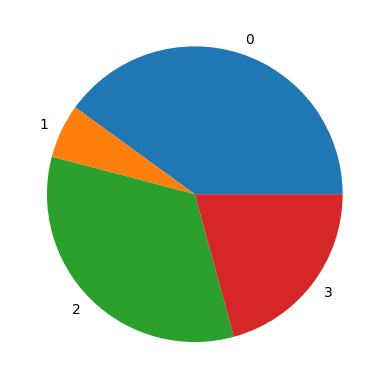

In [255]:
diagram = []
kmeans_clusters = list(kmeans_clusters)

for i in un_clust:
    diagram.append(kmeans_clusters.count(i))

plt.pie(diagram, labels=un_clust)
plt.show()

In [256]:
print("Самые частые слова для каждого кластера:")
for i in un_clust:
    print(f"Кластер {i}, самые частые слова: {top_words[i]}.")

Самые частые слова для каждого кластера:
Кластер 0, самые частые слова: ['английский', 'практика', 'сильный', 'сложно', 'язык', 'история', 'учитель', 'закончить', 'назад', 'свой'].
Кластер 1, самые частые слова: ['видеть', 'плохой', 'заочный', 'студент', 'смениться', 'дошкольный', 'объяснять', 'стоить', 'думать', 'человек'].
Кластер 2, самые частые слова: ['разный', 'понравиться', 'профессия', 'зависеть', 'свой', 'думать', 'качество', 'учеба', 'назад', 'плохой'].
Кластер 3, самые частые слова: ['учеба', 'предмет', 'зачет', 'идти', 'язык', 'наш', 'экзамен', 'зависеть', 'рекомендовать', 'иностранный'].


In [100]:
positive_resp = defaultdict(int)
neutral_resp = defaultdict(int)
negative_resp = defaultdict(int)

dat_to_dat = {"января": "01", "февраля": "02", "марта": "03", "апреля": "04", "мая": "05", "июня": "06", "июля": "07", "августа": "08",
              "сентебря": "09", "октября": "10", "ноября": "11", "декабря": "12"}

resp_count = len(response_dates)

for i in range(resp_count-1, -1, -1):
    date = response_dates[i].split()
    year_month = date[2] + '-' + dat_to_dat[date[1]]
    if int(response_values[i]) > 3:
        positive_resp[year_month] += 1
    elif int(response_values[i]) < 3:
        negative_resp[year_month] += 1
    else:
        neutral_resp[year_month] += 1


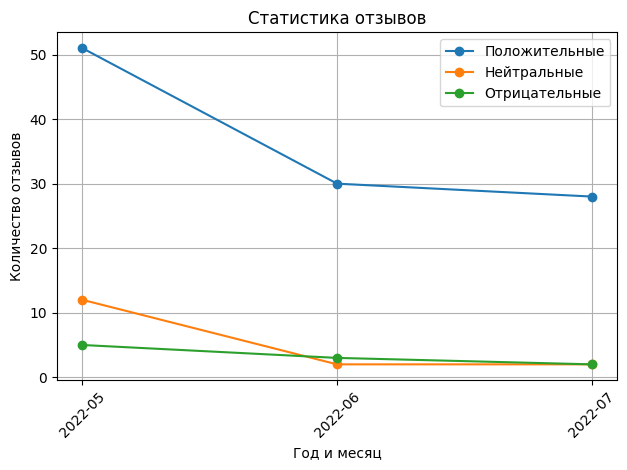

In [101]:
x = list(positive_resp.keys()) 
y_positive = list(positive_resp.values())
y_neutral = [neutral_resp[month] for month in x]
y_negative = [negative_resp[month] for month in x]

plt.plot(x, y_positive, label='Положительные', marker='o')
plt.plot(x, y_neutral, label='Нейтральные', marker='o')
plt.plot(x, y_negative, label='Отрицательные', marker='o')

plt.xlabel('Год и месяц')
plt.ylabel('Количество отзывов')
plt.title('Статистика отзывов')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

In [99]:
positive_resp